# Accident Predictions in Utah

## Group Members
Kyle Cornwall
<br>
Shushanna Mkrtychyan

## Introduction & Motivation
   
Accidents happen all the time. On average, there are over 5,891,000 vehicle crashes each year. Approximately 21% of these crashes - nearly 1,235,000 - are weather-related. Weather-related crashes are defined as those crashes that occur in adverse weather.<br/><br/>
          According to utah.heath.gov, accidents occur in Utah every 10 minutes, a person is injured in a crash every 23 minutes, and a person dies in a crash every 36 hours. There are many reasons what cause crashes in Utah; speed, failure to keep in the proper lane, distracted driving, etc. However, we believe that bad weather and temperature is often a major contributing factor that people get into car crashes. Weather acts through visibility impairments, high winds, and temperature extremes affect drivers capabilities, vehicle performance. These impacts can increase crash risk and severity. <br/><br/>
          Being Utah residents we especially care about our friends and family’s safety. Utah has the most unpredictable weather conditions. People driving in poor conditions need to be extra careful, whether its snow, rain or wind. It is the drivers’ duty to adapt to road conditions, and avoid crashes. 
That motivated us to construct a model that can predict the number of accidents in Salt Lake County based on conducted information on Utah accidents and weather data. 

## Project Objectives


  1. Can we predict the number of car accidents that occur on any given day?          
  2. How much of an impact does snow/rainfall, time of the day, holidays or season, have on crashes on Utah roads? 
  3. What values are important to use or consider, to predict the number of accidents?
  4. Can we predict accident severity based on outside influencing factors (distracted driving, DUI, driver age class, etc...)
  5. Can collected data be used and visualized properly to provide accurate and truthful information?  

We are sampling the data with different approaches to learn the differences between weather, time, temperature, seasons that cause car accidents. We would like to know if data science can help us to accomplish our goals and understand what factors cause accidents. Does snow or wind really have a significant outcomes on a number of crashes in Utah?<br/><br/>
Our goal is to predict if weather conditions have a major impact on crashes in Utah. The benefits that anyone can receive from this project analysis can be examined and used while driving in different weather conditions.  Everyone knows that more accidents occur during bad weather conditions. We can visualize the data and express it in charts, graphs, etc. Additionally, understanding the likely severity of an accident prior to arriving can help first responders better prepare for the scenario.

### Imports and Packages

In [1]:
# imports
import scipy as sc

import pandas as pd
import numpy as np
import statsmodels.formula.api as sm
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import tree, svm, metrics, linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelBinarizer
import sklearn.metrics as metrics
from matplotlib.colors import ListedColormap

import matplotlib.pyplot as plt
%matplotlib inline  
plt.rcParams['figure.figsize'] = (10, 6)

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

## Data
**Accident Data:** https://gis.utah.gov/developer/applications/vehicle-collision/ - Data is provided at an accident grain in the form of a CSV download and lists the time, location, and other factors involved with the accident.

In [2]:
accidentPd = pd.read_csv("Data/DDACTS_download.csv")
accidentPd.head()

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,CRASH_ID,CRASH_DATETIME,ROUTE,MILEPOINT,LAT_UTM_Y,LONG_UTM_X,MAIN_ROAD_NAME,CITY,COUNTY_NAME,CRASH_SEVERITY_ID,...,DOMESTIC_ANIMAL_RELATED,OVERTURN_ROLLOVER,COMMERCIAL_MOTOR_VEH_INVOLVED,TEENAGE_DRIVER_INVOLVED,OLDER_DRIVER_INVOLVED,NIGHT_DARK_CONDITION,SINGLE_VEHICLE,DISTRACTED_DRIVING,DROWSY_DRIVING,ROADWAY_DEPARTURE
0,11140000,"Jan 25, 2019 6:30:19 PM",0171,11.590,4.505807e+06,426338.414049,680 E 3300 S,SOUTH SALT LAKE,SALT LAKE,1,...,N,N,Y,N,Y,Y,N,N,N,N
1,11150000,"Feb 19, 2019 9:23:00 PM",NaN,NaN,4.630235e+06,386251.928653,I-84,NaN,BOX ELDER,3,...,N,N,N,N,N,Y,Y,N,N,N
2,11170000,"Apr 27, 2019 9:45:00 AM",NaN,NaN,NaN,NaN,3500 S,*** ERROR ***,SALT LAKE,1,...,N,N,N,N,N,N,N,N,N,N
3,11180000,"May 24, 2019 6:05:00 PM",0154,4.335,4.483725e+06,418700.852252,BANGERTER HIGHWAY,BLUFFDALE,SALT LAKE,3,...,N,N,N,Y,N,N,N,Y,N,N
4,11230000,"Oct 24, 2019 4:08:00 PM",NaN,NaN,NaN,NaN,PRIVATE DRIVEWAY,SPRINGVILLE,UTAH,1,...,N,N,N,Y,N,N,N,N,N,N


**Weather Data:** This is gathered from the World Weather Online API via one request with an export to a CSV file. The below code snippet demonstrates this using a third party package. The CSV will then be imported to a pandas dataframe. (Documentation: https://www.worldweatheronline.com/developer/api/docs/)

In [3]:
# from wwo_hist import retrieve_hist_data
# frequency = 24
# start_date = '01-JAN-2016'
# end_date = '31-DEC-2019'
# api_key = 'a6cd8966ce0743ef986210109202202'
# location_list = ['salt+lake+city']
# hist_weather_data = retrieve_hist_data(api_key,
#                                 location_list,
#                                 start_date,
#                                 end_date,
#                                 frequency,
#                                 location_label = False,
#                                 export_csv = True,
#                                 store_df = True)
weatherPd = pd.read_csv("Data/salt+lake+city.csv")
weatherPd.head()

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,moonrise,moonset,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
0,2016-01-01,-6,-17,0.0,8.7,1,1,50,No moonrise,12:02 PM,...,-18,15,1,88,0.0,1040,-6,10,89,8
1,2016-01-02,-2,-13,0.0,8.7,1,1,43,12:42 AM,12:31 PM,...,-13,16,27,84,0.0,1036,-2,10,90,8
2,2016-01-03,1,-11,0.0,8.7,1,1,36,01:39 AM,01:01 PM,...,-9,14,41,86,0.0,1031,1,10,99,7
3,2016-01-04,0,-6,0.0,7.0,1,1,28,02:34 AM,01:34 PM,...,-7,17,50,81,0.0,1027,0,8,188,9
4,2016-01-05,2,-2,0.6,7.0,1,1,21,03:32 AM,02:09 PM,...,-4,29,55,86,1.0,1014,2,8,142,15


## Ethical considerations

The data gathered in this project is publically available and is typically used for research purposes. 
No data or information was utilized that would violate the privacy or confidentiality of any organization or people in general. We were careful to adhere to all API request limits and data requirements denoted on the respective websites.

## Data Processing

There are a few missing values throughout the accident data. Particularly in the city, latitude, longitude, milepoint, and route columns. The county column seems fairly populated though and should at least allow us to narrow the missing columns we are interested in. We can then potentially include a portion of them based off of the other column information.<br/>

We have filtered down to a year of data in the weather dataset for Salt Lake County so as to be sure the match time horizons between both sets. The accident data set has also been reduced to only reflect Salt Lake County. Additionally, the classification models we are going to use require the predictive features to be binary numerical flags. Consequently, we are transforming the Y/N flags to be 1/0. We will then try to predict accident severity based off of a variety of these featuers. <br/>

To combine the datasets we needed group the accident data by day and append the resultant counts to the 2019 weather set. This should allow us to run regression analyses to attempt to predict the number of accidents per day.

In [4]:
weather2019 = weatherPd[(weatherPd['date_time'] > '2018-12-31') & (weatherPd['date_time'] < '2020-01-01')]
saltLakeAccidents = accidentPd.loc[accidentPd["COUNTY_NAME"] == "SALT LAKE"]
saltLakeAccidents["DUI"] = saltLakeAccidents.DUI.eq('Y').mul(1)
saltLakeAccidents["DISTRACTED_DRIVING"] = saltLakeAccidents.DISTRACTED_DRIVING.eq('Y').mul(1)
saltLakeAccidents["WORK_ZONE_RELATED"] = saltLakeAccidents.WORK_ZONE_RELATED.eq('Y').mul(1)
saltLakeAccidents["PEDESTRIAN_INVOLVED"] = saltLakeAccidents.PEDESTRIAN_INVOLVED.eq('Y').mul(1)
saltLakeAccidents["BICYCLIST_INVOLVED"] = saltLakeAccidents.BICYCLIST_INVOLVED.eq('Y').mul(1)
saltLakeAccidents["MOTORCYCLE_INVOLVED"] = saltLakeAccidents.MOTORCYCLE_INVOLVED.eq('Y').mul(1)
saltLakeAccidents["IMPROPER_RESTRAINT"] = saltLakeAccidents.IMPROPER_RESTRAINT.eq('Y').mul(1)
saltLakeAccidents["UNRESTRAINED"] = saltLakeAccidents.UNRESTRAINED.eq('Y').mul(1)
saltLakeAccidents["INTERSECTION_RELATED"] = saltLakeAccidents.INTERSECTION_RELATED.eq('Y').mul(1)
saltLakeAccidents["WILD_ANIMAL_RELATED"] = saltLakeAccidents.WILD_ANIMAL_RELATED.eq('Y').mul(1)
saltLakeAccidents["DOMESTIC_ANIMAL_RELATED"] = saltLakeAccidents.DOMESTIC_ANIMAL_RELATED.eq('Y').mul(1)
saltLakeAccidents["OVERTURN_ROLLOVER"] = saltLakeAccidents.OVERTURN_ROLLOVER.eq('Y').mul(1)
saltLakeAccidents["COMMERCIAL_MOTOR_VEH_INVOLVED"] = saltLakeAccidents.COMMERCIAL_MOTOR_VEH_INVOLVED.eq('Y').mul(1)
saltLakeAccidents["TEENAGE_DRIVER_INVOLVED"] = saltLakeAccidents.TEENAGE_DRIVER_INVOLVED.eq('Y').mul(1)
saltLakeAccidents["OLDER_DRIVER_INVOLVED"] = saltLakeAccidents.OLDER_DRIVER_INVOLVED.eq('Y').mul(1)
saltLakeAccidents["NIGHT_DARK_CONDITION"] = saltLakeAccidents.NIGHT_DARK_CONDITION.eq('Y').mul(1)
saltLakeAccidents["SINGLE_VEHICLE"] = saltLakeAccidents.SINGLE_VEHICLE.eq('Y').mul(1)
saltLakeAccidents["DROWSY_DRIVING"] = saltLakeAccidents.DROWSY_DRIVING.eq('Y').mul(1)
saltLakeAccidents["ROADWAY_DEPARTURE"] = saltLakeAccidents.ROADWAY_DEPARTURE.eq('Y').mul(1)
saltLakeAccidents["MINOR_ACCIDENT"] = saltLakeAccidents["CRASH_SEVERITY_ID"] <= 2
saltLakeAccidents["MINOR_ACCIDENT"] = saltLakeAccidents["MINOR_ACCIDENT"].astype(int)
saltLakeMajorAccidents = saltLakeAccidents.loc[saltLakeAccidents["MINOR_ACCIDENT"] < 1]
slAccidentsDaily = pd.DataFrame({'accidentCount': saltLakeAccidents.groupby(pd.to_datetime(saltLakeAccidents["CRASH_DATETIME"]).dt.date).size()})
weather2019.insert(2,'date',pd.to_datetime(weather2019['date_time']).dt.date,True)
weather2019.drop_duplicates(subset ="date", keep = 'first', inplace = True)
mergedData = pd.merge(weather2019, slAccidentsDaily, left_on="date", right_on="CRASH_DATETIME", how='left')
mergedDataClean = mergedData.drop(['uvIndex', 'uvIndex.1'], axis=1)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:5: Settin

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


## Exploratory Analysis
**2019 Weather Trending**<br/>
Looking at the below charts we can see that there are spikes in precipitation and snow at the year-end. This is to be expected due to weather seasonality and temperature trends. Unsurprisingly, the temperature seems to be much cooler at the beginning and ends of the year likely resulting in more of the precipitation becoming snow.

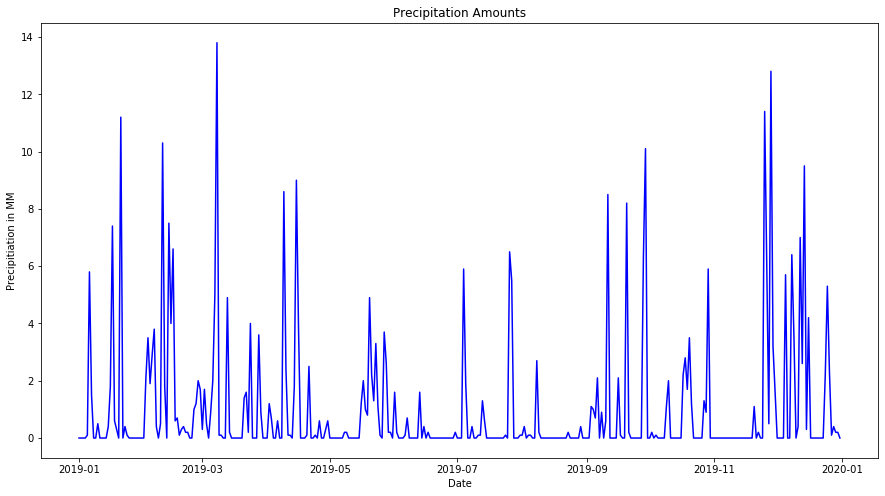

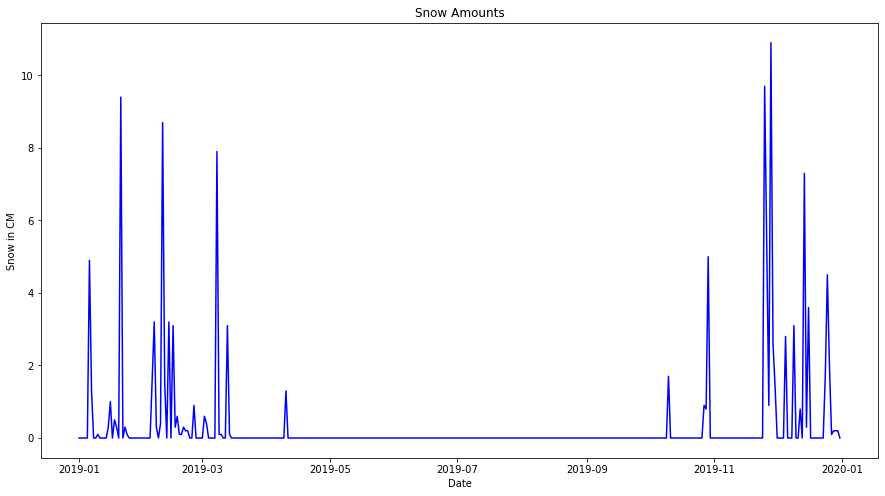

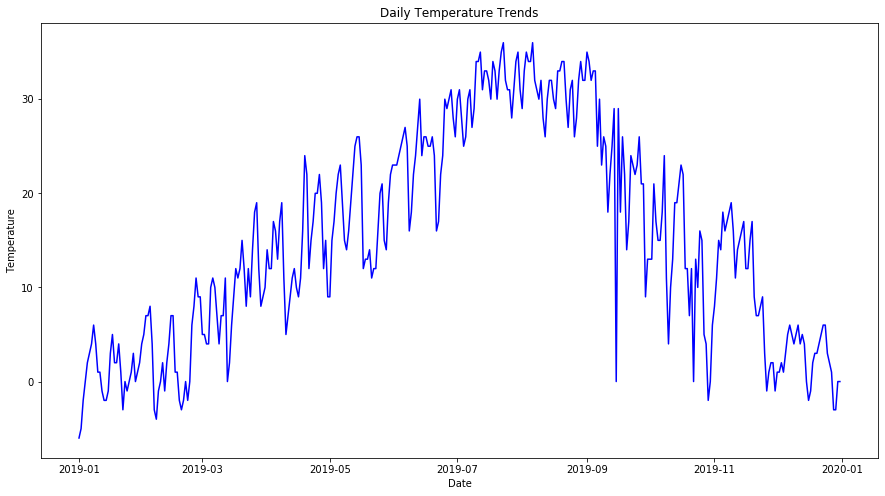

In [5]:
plt.figure(figsize=(15,8))
plt.plot(pd.to_datetime(weather2019['date_time']).dt.date,weather2019["precipMM"],color='blue')
plt.xlabel('Date')
plt.ylabel('Precipitiation in MM')
plt.title('Precipitation Amounts')
plt.show()
plt.figure(figsize=(15,8))
plt.plot(pd.to_datetime(weather2019['date_time']).dt.date,weather2019["totalSnow_cm"],color='blue')
plt.xlabel('Date')
plt.ylabel('Snow in CM')
plt.title('Snow Amounts')
plt.show()
plt.figure(figsize=(15,8))
plt.plot(pd.to_datetime(weather2019['date_time']).dt.date,weather2019["tempC"],color='blue')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Daily Temperature Trends')
plt.show()

**2019 Accident Trending**<br/>
The number of daily accidents is quite variable throughout the year. However, there do seem to be spikes in the data at year-end suggesting a potential correlation to the snow and temperature trending data observed above. 

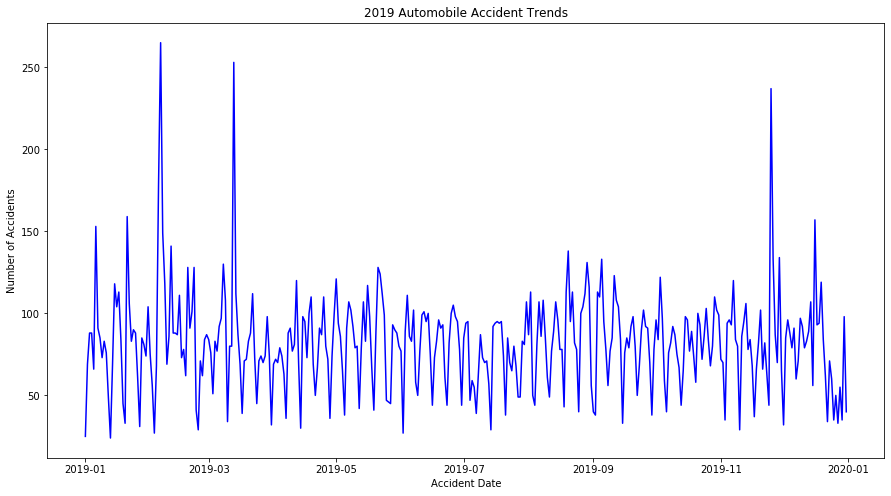

In [6]:
plt.figure(figsize=(15,8))
plt.plot(slAccidentsDaily,color='blue')
plt.xlabel('Accident Date')
plt.ylabel('Number of Accidents')
plt.title('2019 Automobile Accident Trends')
plt.show()

## Predicting the Number of Daily Accidents


**Scatter Matrix and Heat Map Visualization**<br/>
By looking at Heat Map we can see the correlation between the variables. The variables that are most correlated with accidents are Total Snow, Cloud Cover, Wind Direction and Precipitation in millimiters (which is strongly correlated with Total Snow). 

In general, we would think that Visibility would have a major/significant impact on accidents, but from the correlation map, we observe that it's not very correlated. Can we conclude or observe that people drive more carefully when visibility is poor?

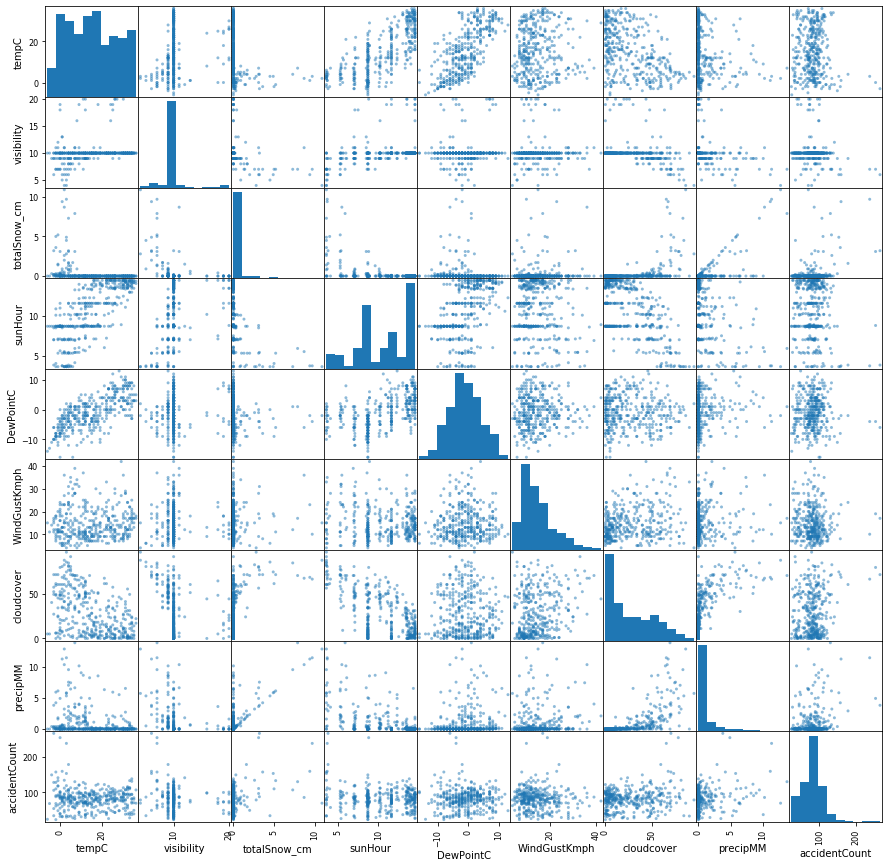

In [8]:
pd.plotting.scatter_matrix(mergedDataClean[['tempC', 'visibility', 'totalSnow_cm', 'sunHour', 'DewPointC', 'WindGustKmph', 'cloudcover', 'precipMM','accidentCount']], figsize=(15,15))
print()

In [9]:
mergedDataClean.corr()

,maxtempC,mintempC,totalSnow_cm,sunHour,moon_illumination,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,accidentCount
maxtempC,1.000000,0.960627,-0.286041,0.751537,0.048262,0.707617,0.980352,0.979399,0.981011,0.048534,-0.476925,-0.830584,-0.241737,-0.459110,1.000000,0.190052,0.330387,0.069389,-0.067569
mintempC,0.960627,1.000000,-0.248658,0.695989,0.055589,0.775225,0.975413,0.978338,0.975675,0.082574,-0.369676,-0.766075,-0.166702,-0.523363,0.960627,0.157366,0.340871,0.119528,-0.047265
totalSnow_cm,-0.286041,-0.248658,1.000000,-0.436918,-0.095327,-0.107761,-0.276030,-0.264258,-0.275263,0.074337,0.446529,0.357298,0.717381,-0.081061,-0.286041,-0.332366,-0.010008,0.083686,0.344358
sunHour,0.751537,0.695989,-0.436918,1.000000,0.042157,0.514451,0.739408,0.736469,0.739443,-0.109004,-0.642987,-0.674778,-0.462768,-0.253462,0.751537,0.324994,0.356507,-0.048661,-0.128861
moon_illumination,0.048262,0.055589,-0.095327,0.042157,1.000000,-0.015528,0.054416,0.052922,0.052630,-0.036038,-0.038597,-0.091550,-0.040541,0.061643,0.048262,0.207216,0.027646,-0.081054,0.008895
DewPointC,0.707617,0.775225,-0.107761,0.514451,-0.015528,1.000000,0.760182,0.766961,0.755250,0.034500,-0.026428,-0.265059,0.117555,-0.572534,0.707617,0.091311,0.297785,0.094900,-0.007510
FeelsLikeC,0.980352,0.975413,-0.276030,0.739408,0.054416,0.760182,1.000000,0.996673,0.999602,0.042472,-0.441546,-0.805857,-0.206220,-0.500987,0.980352,0.175296,0.336709,0.067404,-0.066806
HeatIndexC,0.979399,0.978338,-0.264258,0.736469,0.052922,0.766961,0.996673,1.000000,0.996416,0.089738,-0.418677,-0.802958,-0.191032,-0.520974,0.979399,0.177456,0.324696,0.121308,-0.060293
WindChillC,0.981011,0.975675,-0.275263,0.739443,0.052630,0.755250,0.999602,0.996416,1.000000,0.044170,-0.443390,-0.808249,-0.207565,-0.500657,0.981011,0.171994,0.335824,0.068975,-0.066611
WindGustKmph,0.048534,0.082574,0.074337,-0.109004,-0.036038,0.034500,0.042472,0.089738,0.044170,1.000000,0.239285,-0.093821,0.144571,-0.285031,0.048534,-0.001914,-0.318100,0.902590,-0.052453


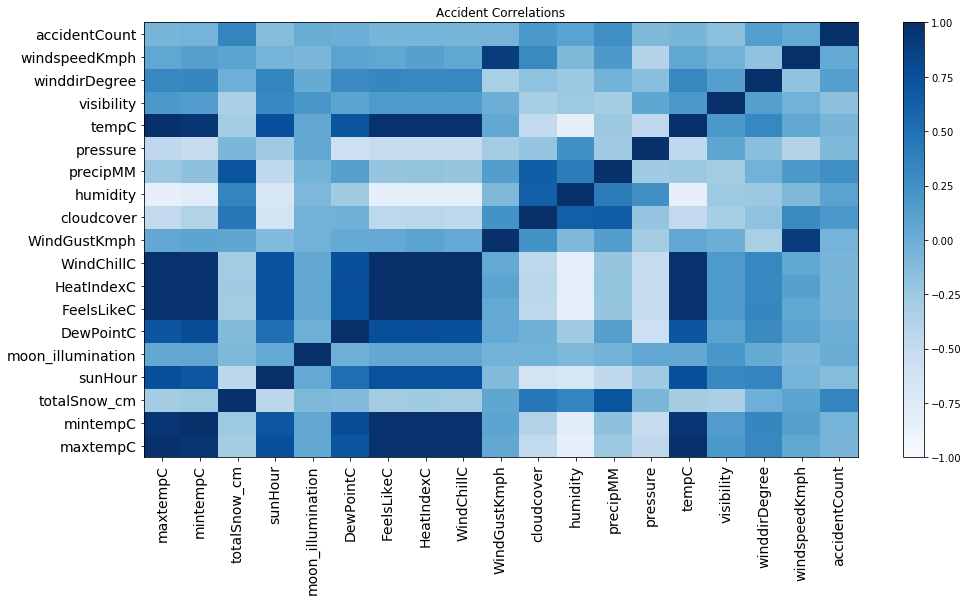

In [10]:
plt.figure(figsize=(16,8))
heatmap = plt.pcolor(mergedDataClean.corr(), cmap=plt.cm.Blues, vmin=-1, vmax=1)
plt.colorbar(heatmap)
plt.xticks(np.arange(0, 19)+0.5, mergedDataClean.corr().columns, fontsize=14, rotation=90)
plt.yticks(np.arange(0, 19)+0.5, mergedDataClean.corr().columns, fontsize=14)
plt.title('Accident Correlations')
plt.show()

### Linear Regression Model 


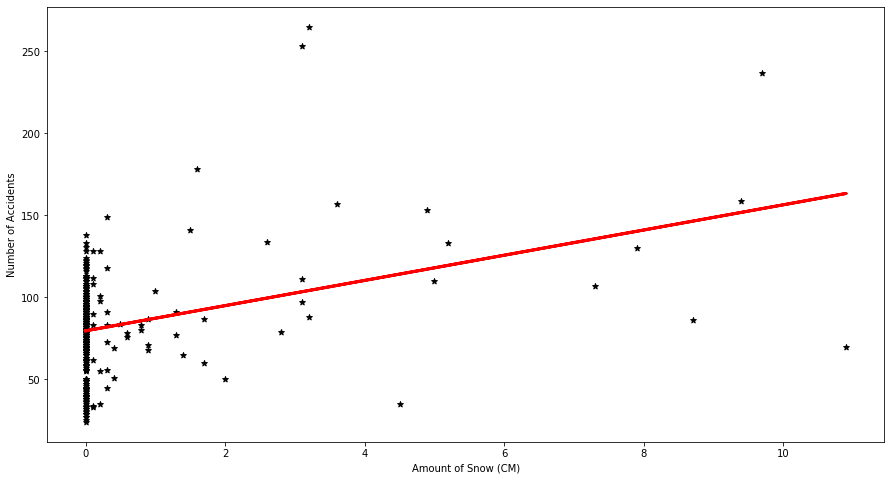

In [11]:
snowOls = sm.ols(formula="accidentCount ~ totalSnow_cm", data=mergedDataClean).fit()
plt.figure(figsize=(15,8))
plt.scatter(x=mergedDataClean.totalSnow_cm,y=mergedDataClean.accidentCount,c='k',marker='*',label='Number of Accidents')
plt.plot(mergedDataClean.totalSnow_cm,snowOls.predict(),'k',color='red',linewidth=3)

plt.xlabel('Amount of Snow (CM)')
plt.ylabel('Number of Accidents')
plt.show()

### ➡ 
Creating our First Linear Regression Model with all the variables helps us to visualize which variables are most related to the number of accidents. 
By looking at p-values we can observe that the Total Snow is statistically significant. 
The next two variables that are also seemed to be statistically significant are Wind Gust and Cloud Cover. 

In [12]:
newOls = sm.ols(formula="accidentCount ~ tempC + visibility + totalSnow_cm + sunHour + DewPointC + WindGustKmph + cloudcover + precipMM", data=mergedDataClean).fit()
newOls.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          accidentCount   R-squared:                       0.137
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     7.088
Date:                Thu, 09 Apr 2020   Prob (F-statistic):           1.05e-08
Time:                        17:25:26   Log-Likelihood:                -1730.1
No. Observations:                 365   AIC:                             3478.
Df Residuals:                     356   BIC:                             3513.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       76.3329     13.023      5.861      0.000      50.721     101.945
tempC            0.3111      0.265      1.174      0.241      -0.210       0.832
visibility      -0.6239      0.749     -0.833      0.405      -2.097       0.849
totalSnow_cm     7.2182      1.673      4.315      0.000       3.928      10.508
sunHour          0.5993      0.870      0.689      0.491      -1.112       2.310
DewPointC       -0.4223      0.486     -0.868      0.386      -1.379       0.534
WindGustKmph    -0.4713      0.228     -2.068      0.039      -0.919      -0.023
cloudcover       0.1898      0.107      1.778      0.076      -0.020       0.400
precipMM        -0.0194      1.191     -0.016      0.987      -2.362       2.323
==============================================================================
Omnibus:                       71.978   Durbin-Watson:                   1.340
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              376.788
Skew:                           0.701   Prob(JB):                     1.52e-82
Kurtosis:                       7.776   Cond. No.                         372.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### ➡
From the original regression model, we have predicted that the "Total Snow", "Wind Gust" and "Cloud Cover" variables have the most impact on accident prediction.

But looking at the next two models we can observe that:

Creating a Regression Model with just those 3 variables mentioned above, is not that great and doesn't provide a valuable information, and we can detect that by looking at R-squared (which is low)  and p-values (two high).
When we include interaction, which is provided in the second model, we observe that the R-square is higher and p-values are smaller for most variables. 
With that information, we can conclude, that Total Snow is still significant, and the Total Snow with Cloud Cover is also very significant.

In [13]:
newOls = sm.ols(formula="accidentCount ~ totalSnow_cm + WindGustKmph + cloudcover", data=mergedDataClean).fit()
newOls.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          accidentCount   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.121
Method:                 Least Squares   F-statistic:                     17.70
Date:                Thu, 09 Apr 2020   Prob (F-statistic):           9.74e-11
Time:                        17:25:26   Log-Likelihood:                -1732.0
No. Observations:                 365   AIC:                             3472.
Df Residuals:                     361   BIC:                             3488.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       83.3327      3.597     23.170      0.000      76.260      90.406
totalSnow_cm     7.1604      1.226      5.839      0.000       4.749       9.572
WindGustKmph    -0.3995      0.219     -1.827      0.068      -0.830       0.030
cloudcover       0.0839      0.070      1.203      0.230      -0.053       0.221
==============================================================================
Omnibus:                       72.727   Durbin-Watson:                   1.342
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              367.551
Skew:                           0.722   Prob(JB):                     1.54e-80
Kurtosis:                       7.699   Cond. No.                         95.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
newOls = sm.ols(formula="accidentCount ~ totalSnow_cm*WindGustKmph*cloudcover", data=mergedDataClean).fit()
newOls.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          accidentCount   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.177
Method:                 Least Squares   F-statistic:                     12.19
Date:                Thu, 09 Apr 2020   Prob (F-statistic):           5.55e-14
Time:                        17:25:27   Log-Likelihood:                -1717.9
No. Observations:                 365   AIC:                             3452.
Df Residuals:                     357   BIC:                             3483.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                               83.0177      5.607     14.806      0.000      71.991      94.045
totalSnow_cm                           103.3987     21.691      4.767      0.000      60.741     146.056
WindGustKmph                            -0.4398      0.388     -1.134      0.257      -1.203       0.323
totalSnow_cm:WindGustKmph               -4.2183      1.413     -2.986      0.003      -6.996      -1.440
cloudcover                               0.0833      0.148      0.561      0.575      -0.209       0.375
totalSnow_cm:cloudcover                 -1.2922      0.307     -4.213      0.000      -1.895      -0.689
WindGustKmph:cloudcover                  0.0013      0.009      0.145      0.885      -0.016       0.019
totalSnow_cm:WindGustKmph:cloudcover     0.0575      0.021      2.790      0.006       0.017       0.098
==============================================================================
Omnibus:                       72.586   Durbin-Watson:                   1.303
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              319.915
Skew:                           0.767   Prob(JB):                     3.40e-70
Kurtosis:                       7.322   Cond. No.                     2.94e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.94e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We would like to see how much of impact does snow have on accident prediction. The next Regression Model we chose to not include the "Total Snow" variable. Just by looking at R-square value we can observe, that this is not a great model for predicting accidents. 

In [15]:
newOls = sm.ols(formula="accidentCount ~ WindGustKmph*cloudcover", data=mergedDataClean).fit()
newOls.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          accidentCount   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     5.917
Date:                Thu, 09 Apr 2020   Prob (F-statistic):           0.000598
Time:                        17:25:28   Log-Likelihood:                -1748.3
No. Observations:                 365   AIC:                             3505.
Df Residuals:                     361   BIC:                             3520.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  84.2856      5.931     14.212      0.000      72.623      95.948
WindGustKmph               -0.6585      0.412     -1.599      0.111      -1.468       0.151
cloudcover                  0.1863      0.143      1.307      0.192      -0.094       0.467
WindGustKmph:cloudcover     0.0054      0.009      0.616      0.538      -0.012       0.023
==============================================================================
Omnibus:                      117.612   Durbin-Watson:                   1.340
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              675.423
Skew:                           1.227   Prob(JB):                    2.16e-147
Kurtosis:                       9.196   Cond. No.                     2.65e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.65e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Meteorogical Factors on Accident Prediction Summary

Exploring weather factors, we can observe numerous variables that have an impact on accidents. Linear Regression Models helped to examine the relationship between the variables (snow amount, temperature, wind, etc.) and determine which variables are significant predictors. The outcomes have shown that the amount of snow in relation with cloud cover has the most significant impact on the number of accidents.

## Predicting Accident Severity
Often times, first responders are unaware of what awaits them at the scene of an accident. This can result in being unprepared and potential adverse outcomes. Being able to predict accident severity based on a variety of features could allow for more appropriate preparation and potentially better outcomes. First responders would have a better idea of what they are getting into which could lead to more efficient resourcing and appropriate staff on hand. <br/>

Our analysis will span 3 classification models; Random Forest, K-Nearest Neighbors, and Support Vector Machines. We will go through the exercise of plugging in all and a selection of predictive features into the models to determine if we can get away with using fewer features to avoid overfitting. Additionally, given the significant imbalance of minor accident classifications to major, we will also perform a binary classification approach to see if we can determine a major vs minor accident based on the same feature set. The aim would be to achieve a high level of accuracy and, in the case of the binary classification, a high AUC score to maintain legitimacy.

### Variable Prep and Function Construction

In [16]:
from IPython.display import Image, display  
import pydotplus 
from scipy import misc

allFeatures = [
 'WORK_ZONE_RELATED',
 'PEDESTRIAN_INVOLVED',
 'BICYCLIST_INVOLVED',
 'MOTORCYCLE_INVOLVED',
 'IMPROPER_RESTRAINT',
 'UNRESTRAINED',
 'DUI',
 'INTERSECTION_RELATED',
 'WILD_ANIMAL_RELATED',
 'DOMESTIC_ANIMAL_RELATED',
 'OVERTURN_ROLLOVER',
 'COMMERCIAL_MOTOR_VEH_INVOLVED',
 'TEENAGE_DRIVER_INVOLVED',
 'OLDER_DRIVER_INVOLVED',
 'NIGHT_DARK_CONDITION',
 'SINGLE_VEHICLE',
 'DISTRACTED_DRIVING',
 'DROWSY_DRIVING',
 'ROADWAY_DEPARTURE']
someFeatures = [
 'PEDESTRIAN_INVOLVED',
  'BICYCLIST_INVOLVED',
 'MOTORCYCLE_INVOLVED',
 'NIGHT_DARK_CONDITION',
 'TEENAGE_DRIVER_INVOLVED',
  'DISTRACTED_DRIVING'
]

def renderTree(my_tree, features):
    # hacky solution of writing to files and reading again
    # necessary due to library bugs
    filename = "temp.dot"
    with open(filename, 'w') as f:
        f = tree.export_graphviz(my_tree, 
                                 out_file=f, 
                                 feature_names=features, 
                                 class_names=["1", "2","3","4","5"],  
                                 filled=True, 
                                 rounded=True,
                                 special_characters=True)
  
    dot_data = ""
    with open(filename, 'r') as f:
        dot_data = f.read()

    graph = pydotplus.graph_from_dot_data(dot_data)
    image_name = "temp.png"
    graph.write_png(image_name)  
    display(Image(filename=image_name))

def splitData(features, binary=False):
    severityPredictors = saltLakeAccidents[features].values
    if binary:
        severityLabels = saltLakeAccidents["MINOR_ACCIDENT"].values
    else:
        severityLabels = saltLakeAccidents["CRASH_SEVERITY_ID"].values
    
    xTrain, xTest, yTrain, yTest = train_test_split(severityPredictors, severityLabels, test_size=0.5, random_state=1)
    return xTrain, xTest, yTrain, yTest

def minSplitData(features, binary=False):
    miniSLCAccidents = saltLakeAccidents.sample(10000)
    severityPredictors = miniSLCAccidents[features].values
    if binary:
        severityLabels = miniSLCAccidents["MINOR_ACCIDENT"].values
    else:
        severityLabels = miniSLCAccidents["CRASH_SEVERITY_ID"].values
    
    xTrain, xTest, yTrain, yTest = train_test_split(severityPredictors, severityLabels, test_size=0.5, random_state=1)
    return xTrain, xTest, yTrain, yTest

def majorSplitData(features):
    severityPredictors = saltLakeMajorAccidents[features].values
    severityLabels = saltLakeMajorAccidents["CRASH_SEVERITY_ID"].values
    
    xTrain, xTest, yTrain, yTest = train_test_split(severityPredictors, severityLabels, test_size=0.5, random_state=1)
    return xTrain, xTest, yTrain, yTest

def majorMinSplitData(features):
    severityPredictors = saltLakeMajorAccidents[features].values
    severityLabels = saltLakeMajorAccidents["CRASH_SEVERITY_ID"].values
    
    xTrain, xTest, yTrain, yTest = train_test_split(severityPredictors, severityLabels, test_size=0.5, random_state=1)
    return xTrain, xTest, yTrain, yTest

## Random Forest Analysis (MultiClass)
The Random Forest multi-class approach with all the variables seems to yield decent accuracy at appx 73% with a max tree depth of 10 levels. However, closer observation of the confusion matrix indicates that it may be a bit deceiving. The model is clearly trying to always predict a class 1 given its significant size. It, therefore, achieves a higher accuracy by almost always predicting 1. Perhaps a binary approach would yield better results.

Confusion Matrix:
[[10676    20    31     3     1]
 [ 2572    64   129     8     1]
 [ 1009    74   153    10     1]
 [  129    27    46     4     1]
 [   23     6     6     2     0]]
Accuracy on training data =  0.7418472824274758
Accuracy on test data =  0.7266604427847426


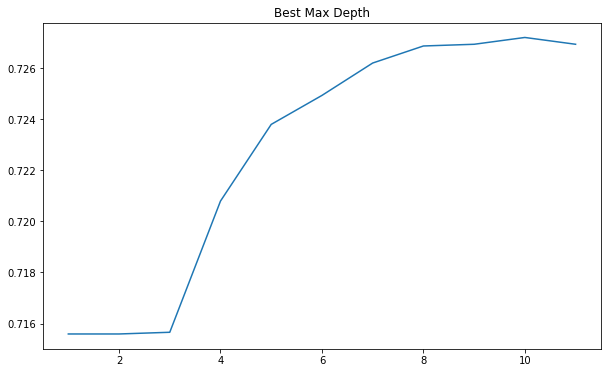

In [43]:
xTrain, xTest, yTrain, yTest = splitData(allFeatures)
randomForest = RandomForestClassifier(bootstrap=True, n_estimators=500, max_depth=10)
trainedForest = randomForest.fit(xTrain, yTrain)
yPredictTrain = trainedForest.predict(xTrain)
yPredict = trainedForest.predict(xTest)
print('Confusion Matrix:')
print(metrics.confusion_matrix(y_true = yTest, y_pred = yPredict))
print('Accuracy on training data = ', metrics.accuracy_score(y_true = yTrain, y_pred = yPredictTrain))
print('Accuracy on test data = ', metrics.accuracy_score(y_true = yTest, y_pred = yPredict))
Cs = np.arange(1,12)
Accuracies = np.zeros(Cs.shape[0])
for i,C in enumerate(Cs):
    crossTree = RandomForestClassifier(bootstrap=True, n_estimators=500,max_depth=C)
    treeCrossModel = crossTree.fit(xTrain, yTrain)
    scores = cross_val_score(estimator = treeCrossModel, X = xTest, y = yTest, cv=5, scoring='accuracy')    
    Accuracies[i]  = scores.mean()
plt.plot(Cs,Accuracies)
plt.title('Best Max Depth')
plt.show()

# renderTree(decisionTree, allFeatures)

## Random Forest Analysis (Binary)
Splitting the data into 2 categories, minor accidents and major accidents, seems to yield better results. Minor accidents would be defined as an accident with a severity score of 2 or less. Running the model at this threshold yields very high accuracy at 91%. To legitimize the model, we felt it would be appropriate to look at the AUC metric to ensure that the minor accident class size was not inappropriately influencing the results. Looking at the AUC score (0.63) it seems that the class sizes do play a role in the model outcomes. This AUC score is not horrible, but it would indicate that the results are perhaps not entirely reliable.

Confusion Matrix:
[[  253  1238]
 [  202 13303]]
Accuracy on training data =  0.9161720573524508
Accuracy on test data =  0.9039743931715124


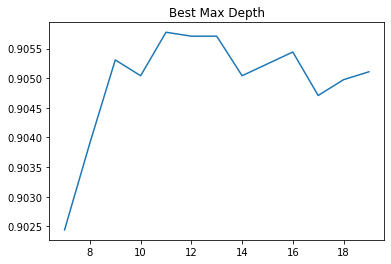

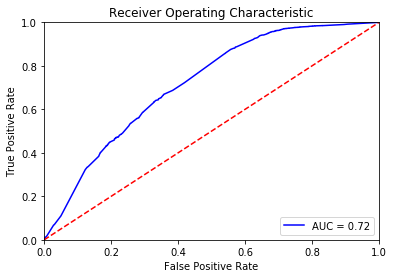

In [18]:
xTrain, xTest, yTrain, yTest = splitData(allFeatures, True)
randomForest = RandomForestClassifier(bootstrap=True, n_estimators=300, max_depth=11)
trainedForest = randomForest.fit(xTrain, yTrain)

yPredictTrain = trainedForest.predict(xTrain)
yPredict = trainedForest.predict(xTest)
print('Confusion Matrix:')
print(metrics.confusion_matrix(y_true = yTest, y_pred = yPredict))
print('Accuracy on training data = ', metrics.accuracy_score(y_true = yTrain, y_pred = yPredictTrain))
print('Accuracy on test data = ', metrics.accuracy_score(y_true = yTest, y_pred = yPredict))
Cs = np.arange(7,20)
Accuracies = np.zeros(Cs.shape[0])
for i,C in enumerate(Cs):
    crossTree = RandomForestClassifier(bootstrap=True, n_estimators=300,max_depth=C)
    treeCrossModel = crossTree.fit(xTrain, yTrain)
    scores = cross_val_score(estimator = treeCrossModel, X = xTest, y = yTest, cv=5, scoring='accuracy')    
    Accuracies[i]  = scores.mean()
plt.plot(Cs,Accuracies)
plt.title('Best Max Depth')
plt.show()

# calculate the fpr and tpr for all thresholds of the classification
probs = trainedForest.predict_proba(xTest)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(yTest, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
rFBinary = plt
rFBinary.show()

## Random Forest Analysis (MultiClass Major Accidents Only)
In an effort to decrease the influence of the larger class sizes (1,2), we tried to narrow the scope to just trying to predict severity scores of major accidents with a score of 3 or above. This yielded an accuracy of 83% which seems promising. However, a look at the confusion matrix seems to indicate that the model is simply always predicting 3 given its size in relation to the other severities. So again not terribly accurate. 

Confusion Matrix:
[[1224    3    0]
 [ 217    2    0]
 [  25    1    0]]
Accuracy on training data =  0.8464673913043478
Accuracy on test data =  0.8328804347826086


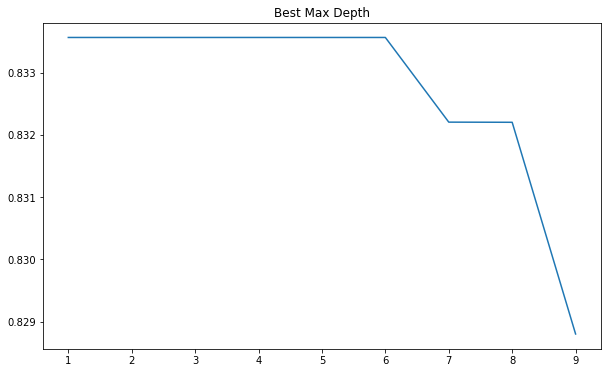

In [45]:
xTrain, xTest, yTrain, yTest = majorSplitData(allFeatures)
randomForest = RandomForestClassifier(bootstrap=True, n_estimators=500, max_depth=6)
trainedForest = randomForest.fit(xTrain, yTrain)

yPredictTrain = trainedForest.predict(xTrain)
yPredict = trainedForest.predict(xTest)
print('Confusion Matrix:')
print(metrics.confusion_matrix(y_true = yTest, y_pred = yPredict))
print('Accuracy on training data = ', metrics.accuracy_score(y_true = yTrain, y_pred = yPredictTrain))
print('Accuracy on test data = ', metrics.accuracy_score(y_true = yTest, y_pred = yPredict))
Cs = np.arange(1,10)
Accuracies = np.zeros(Cs.shape[0])
for i,C in enumerate(Cs):
    crossTree = RandomForestClassifier(bootstrap=True, n_estimators=500,max_depth=C)
    treeCrossModel = crossTree.fit(xTrain, yTrain)
    scores = cross_val_score(estimator = treeCrossModel, X = xTest, y = yTest, cv=5, scoring='accuracy')    
    Accuracies[i]  = scores.mean()
plt.plot(Cs,Accuracies)
plt.title('Best Max Depth')
plt.show()

# renderTree(decisionTree, allFeatures)

## K-Nearest Analysis (MultiClass)
Repeating the multiclass analysis with the K-Nearest Neighbors methodology seems to yield similar results (appx 73% accuracy). The model has ok accuracy. But looking at the confusion matrix reveals a similar problem, it continually tries to predict a severity score of 1 given its disproportionate size. So the accuracy score seems rather misleading.

Confusion Matrix:
[[10463   249    19     0     0]
 [ 2501   162   111     0     0]
 [ 1021   112   113     1     0]
 [  148    25    34     0     0]
 [   27     4     6     0     0]]
Accuracy on training data=  0.7248416138712904
Accuracy =  0.7160576153640971


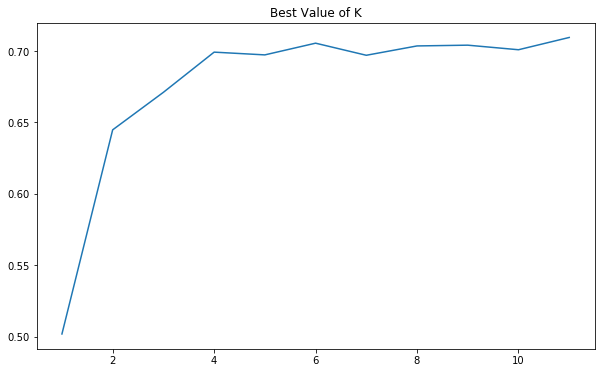

In [47]:
xKTrain, xKTest, yKTrain, yKTest = splitData(allFeatures)
kNewsModel = KNeighborsClassifier(n_neighbors = 11)
kNewsModel.fit(xKTrain,yKTrain)
y_kNews_pred = kNewsModel.predict(xKTest)
print('Confusion Matrix:')
print(metrics.confusion_matrix(y_true = yKTest, y_pred = y_kNews_pred))
print('Accuracy on training data= ', metrics.accuracy_score(y_true = yKTrain, y_pred = kNewsModel.predict(xKTrain)))
print('Accuracy = ', metrics.accuracy_score(y_true = yKTest, y_pred = y_kNews_pred))
Ks = np.arange(1,12)
Accuracies = np.zeros(Ks.shape[0])
for i,C in enumerate(Ks):
    kCrossModel = KNeighborsClassifier(n_neighbors = C)
    scores = cross_val_score(estimator = kCrossModel, X = xKTest, y = yKTest, cv=5, scoring='accuracy')    
    Accuracies[i]  = scores.mean()
plt.plot(Ks,Accuracies)
plt.title('Best Value of K')
plt.show()

## K-Nearest Analysis (Binary)
Similar to the Random Forest binary study, K-Nearest Neighbors yields a very high accuracy score (appx 90%). The confusion matrix does indicate that there are several misclassifications though, so we felt looking at the AUC metric would again be appropriate. This AUC score at .57 is not as good at the Random Forest binary model at .63. Thus, K-Nearest Neighbors is likely not a great path forward in this endeavor.  

Confusion Matrix:
[[  231  1260]
 [  265 13240]]
Accuracy on training data=  0.9099699899966656
Accuracy =  0.8983062149906642


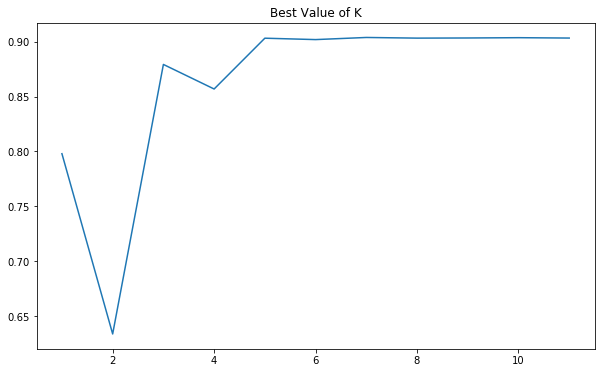

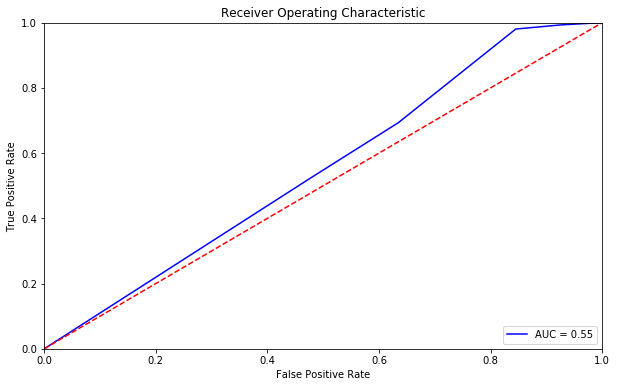

In [49]:
xKTrain, xKTest, yKTrain, yKTest = splitData(allFeatures, True)
kNewsModel = KNeighborsClassifier(n_neighbors = 6)
kNewsModel.fit(xKTrain,yKTrain)
y_kNews_pred = kNewsModel.predict(xKTest)
print('Confusion Matrix:')
print(metrics.confusion_matrix(y_true = yKTest, y_pred = y_kNews_pred))
print('Accuracy on training data= ', metrics.accuracy_score(y_true = yKTrain, y_pred = kNewsModel.predict(xKTrain)))
print('Accuracy = ', metrics.accuracy_score(y_true = yKTest, y_pred = y_kNews_pred))
Ks = np.arange(1,12)
Accuracies = np.zeros(Ks.shape[0])
for i,C in enumerate(Ks):
    kCrossModel = KNeighborsClassifier(n_neighbors = C)
    scores = cross_val_score(estimator = kCrossModel, X = xKTest, y = yKTest, cv=5, scoring='accuracy')    
    Accuracies[i]  = scores.mean()
plt.plot(Ks,Accuracies)
plt.title('Best Value of K')
plt.show()

# calculate the fpr and tpr for all thresholds of the classification
probs = kNewsModel.predict_proba(xKTest)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(yKTest, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
kBinary = plt
kBinary.show()

## K-Nearest Analysis (MultiClass Major Accidents Only)
Looking at just major accidents in a K-Nearest Neighbors analysis reveals a slightly worse outcome than above. Accuracy is at 82%. Again the model suffers from the disproportionate class sizes. Given this in conjunction with the binary analysis, it seems at this point that a random forest approach is better in this scenario.

Confusion Matrix:
[[1227    0    0]
 [ 219    0    0]
 [  26    0    0]]
Accuracy on training data=  0.8396739130434783
Accuracy =  0.8335597826086957


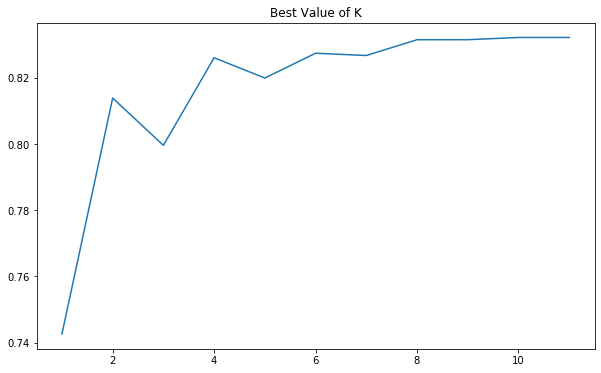

In [51]:
# your solution goes here
xKTrain, xKTest, yKTrain, yKTest = majorSplitData(allFeatures)
kNewsModel = KNeighborsClassifier(n_neighbors = 8)
kNewsModel.fit(xKTrain,yKTrain)
y_kNews_pred = kNewsModel.predict(xKTest)
print('Confusion Matrix:')
print(metrics.confusion_matrix(y_true = yKTest, y_pred = y_kNews_pred))
print('Accuracy on training data= ', metrics.accuracy_score(y_true = yKTrain, y_pred = kNewsModel.predict(xKTrain)))
print('Accuracy = ', metrics.accuracy_score(y_true = yKTest, y_pred = y_kNews_pred))
Ks = np.arange(1,12)
Accuracies = np.zeros(Ks.shape[0])
for i,C in enumerate(Ks):
    kCrossModel = KNeighborsClassifier(n_neighbors = C)
    scores = cross_val_score(estimator = kCrossModel, X = xKTest, y = yKTest, cv=5, scoring='accuracy')    
    Accuracies[i]  = scores.mean()
plt.plot(Ks,Accuracies)
plt.title('Best Value of K')
plt.show()

## Support Vector Machine (MultiClass)
Performing a similar test using a Support Vector Machine analysis methodology again yields similar results. Accuracy is at about 73% and is closer to the Random Forest results than the K-Nearest neighbors approach. It similarly suffers from the disproportionate class sizes, in that it also always tries to predict 1. Thus the accuracy is also somewhat misleading. IT may be worth looking at a One vs All study to attempt to create AUC metrics for each classification.

[[10672     5    54     0     0]
 [ 2577    46   151     0     0]
 [  997    59   191     0     0]
 [  128    15    64     0     0]
 [   19     0    18     0     0]]
Accuracy on training data=  0.7325775258419474
Accuracy =  0.72746065617498


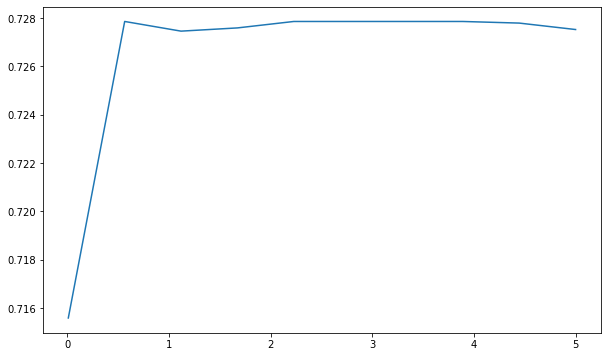

In [52]:
# your solution goes here
xTrain, xTest, yTrain, yTest = splitData(allFeatures)
svmModel = svm.SVC(kernel='rbf',C=2,gamma='auto')
svmModel.fit(xTrain, yTrain)
y_svm_pred = svmModel.predict(xTest)
print(metrics.confusion_matrix(y_true = yTest, y_pred = y_svm_pred))
print('Accuracy on training data= ', metrics.accuracy_score(y_true = yTrain, y_pred = svmModel.predict(xTrain)))
print('Accuracy = ', metrics.accuracy_score(y_true = yTest, y_pred = y_svm_pred))
Cs = np.linspace(.01,5,10)
Accuracies = np.zeros(Cs.shape[0])
for i,C in enumerate(Cs):
    svmCrossModel = svm.SVC(kernel='rbf', C = C,gamma='auto')
    scores = cross_val_score(estimator = svmCrossModel, X = xTest, y = yTest, cv=5, scoring='accuracy')    
    Accuracies[i]  = scores.mean()
plt.plot(Cs,Accuracies)
plt.show()

## Support Vector Machine (Binary)
The support vector machine binary analysis seems to be more on par with what the random forest analysis revealed. With a 91% accuracy score a .62 AUC metric, one could realistically go with either methodology. However, for a model to be more compelling, having an AUC closer in at least the .70 range would be ideal.

[[  277  1214]
 [  205 13300]]
Accuracy on training data=  0.908702900966989
Accuracy =  0.9053747666044278


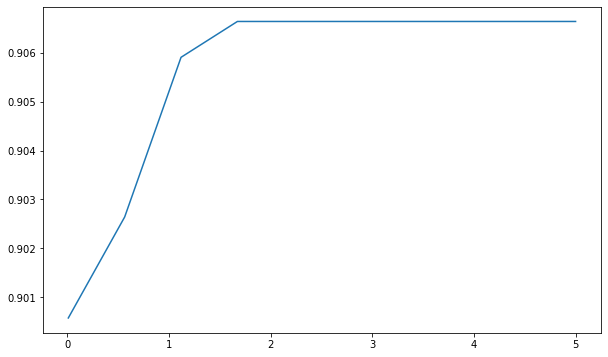

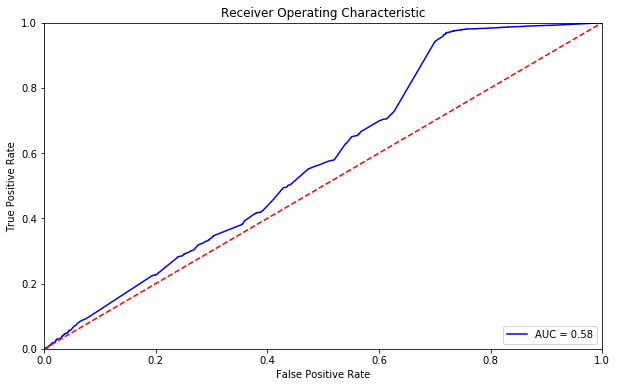

In [53]:
xTrain, xTest, yTrain, yTest = splitData(allFeatures, True)
svmModel = svm.SVC(kernel='rbf',C=1,gamma='auto',probability=True)
svmModel.fit(xTrain, yTrain)
y_svm_pred = svmModel.predict(xTest)
print(metrics.confusion_matrix(y_true = yTest, y_pred = y_svm_pred))
print('Accuracy on training data= ', metrics.accuracy_score(y_true = yTrain, y_pred = svmModel.predict(xTrain)))
print('Accuracy = ', metrics.accuracy_score(y_true = yTest, y_pred = y_svm_pred))
Cs = np.linspace(.01,5,10)
Accuracies = np.zeros(Cs.shape[0])
for i,C in enumerate(Cs):
    svmCrossModel = svm.SVC(kernel='rbf', C = C,gamma='auto')
    scores = cross_val_score(estimator = svmCrossModel, X = xTest, y = yTest, cv=5, scoring='accuracy')    
    Accuracies[i]  = scores.mean()
plt.plot(Cs,Accuracies)
plt.show()

probs = svmModel.predict_proba(xTest)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(yTest, preds)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Support Vector Machine (MultiClass Major Accidents Only)
Performing a support vector machine analysis on only major accidents had an interesting result. While the accuracy score was 83%, here the model always predicted 3. Its interesting to observe the effects a disproportionate class can have. It may be worth looking into a study that would reduce the effects of proportion size on the data.

[[1227    0    0]
 [ 219    0    0]
 [  26    0    0]]
Accuracy on training data=  0.8403532608695652
Accuracy =  0.8335597826086957


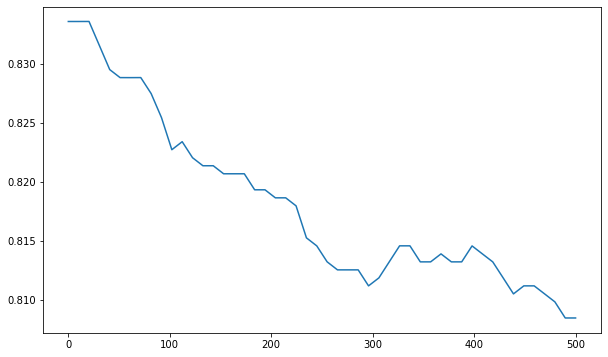

In [54]:
# your solution goes here
xTrain, xTest, yTrain, yTest = majorSplitData(allFeatures)
svmModel = svm.SVC(kernel='rbf',C=2,gamma='auto')
svmModel.fit(xTrain, yTrain)
y_svm_pred = svmModel.predict(xTest)
print(metrics.confusion_matrix(y_true = yTest, y_pred = y_svm_pred))
print('Accuracy on training data= ', metrics.accuracy_score(y_true = yTrain, y_pred = svmModel.predict(xTrain)))
print('Accuracy = ', metrics.accuracy_score(y_true = yTest, y_pred = y_svm_pred))
Cs = np.linspace(.01,500,50)
Accuracies = np.zeros(Cs.shape[0])
for i,C in enumerate(Cs):
    svmCrossModel = svm.SVC(kernel='rbf', C = C,gamma='auto')
    scores = cross_val_score(estimator = svmCrossModel, X = xTest, y = yTest, cv=5, scoring='accuracy')    
    Accuracies[i]  = scores.mean()
plt.plot(Cs,Accuracies)
plt.show()

## Neural Networks (Binary)

[[  242  1249]
 [  225 13280]]
Accuracy on training data=  0.9163054351450484
Accuracy =  0.9017071218991731


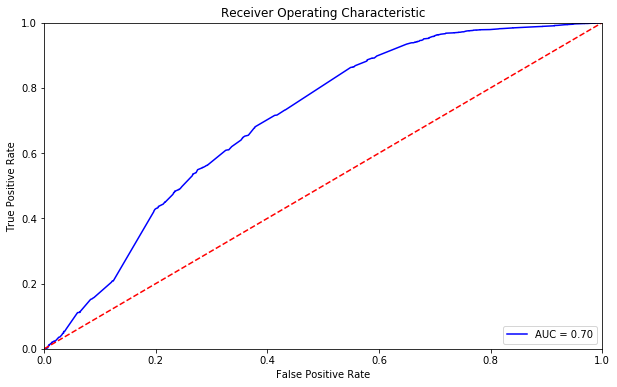

In [56]:
xTrain, xTest, yTrain, yTest = splitData(allFeatures, True)
mlpModel = MLPClassifier(hidden_layer_sizes=(19,19,19),random_state=1)
mlpModel.fit(xTrain, yTrain)
y_mlp_pred = mlpModel.predict(xTest)
print(metrics.confusion_matrix(y_true = yTest, y_pred = y_mlp_pred))
print('Accuracy on training data= ', metrics.accuracy_score(y_true = yTrain, y_pred = mlpModel.predict(xTrain)))
print('Accuracy = ', metrics.accuracy_score(y_true = yTest, y_pred = y_mlp_pred))

probs = mlpModel.predict_proba(xTest)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(yTest, preds)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Accident Severity Summary

Given the unbalanced nature of the data, predicting the accident severity from the data in its raw form proved difficult and misleading. When reducing the data to a binary state, this seemed to yield far better accuracy results (close to 0.9). Looking at the AUC statistic, both the Random Forest classifier seemed to have the best results with high accuracy and a decent AUC score at 0.72. Thus, predicting accident severity in a binary state with either of this methodology is ideal. 

## Project Conclusion
Today, multiple applications can be downloaded to our smartphones that provide reliable weather and traffic information. Despite these tools, accidents still tend to spike as winter and the first snowstorms arrive.

As demonstrated above, numerous factors can influence the probability of elevated car accidents such as: the amount of snow, temperature, visibility, wind, cloud cover, etc. Using several linear regression models, we concluded that the amount of snow in conjunction with cloud cover has the most significant impact on the number of accidents. 

Given that accidents tend to still occur, we attempted to construct various classification models aimed at predicting accident severity based on outside influencing factors: DUI, distracted driving, driver age, etc.  Splitting the severity ratings into a binary model between major and minor accidents tended to yield better and more reliable results. This binary analysis utilizing the random forest classification approach seemed to yield the best and most reliable results. 

The application of machine learning models in predicting and potentially preventing accidents is an ongoing process. However further analysis in this area is sure to result in positive improvements, fewer accidents, and ultimately lives saved.

